In [ ]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTRODUCTION TO TEXT MINING PART3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [1]:
#=================================================-
#### Slide 7: Directory settings  ####

from pathlib import Path
# Set `home_dir` to the root directory of your computer. 
home_dir = Path.home()

# Set `main_dir` to the location of your `booz-allen-hamilton` folder.
main_dir = home_dir / "Documents" / "NLP_Intro" / "intro-to-text-mining-main"
# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = main_dir / "data"


In [2]:
#=================================================-
#### Slide 8: Working directory  ####
import os
# Set working directory.
os.chdir(data_dir)

# Check working directory.
print(os.getcwd())

/Users/amirmokhtari/Documents/NLP_Intro/intro-to-text-mining-main/data


In [3]:
#=================================================-
#### Slide 9: Import packages  ####

# Helper packages.
import os
import pickle
import pandas as pd
import numpy as np

# Cosine similarity and clustering packages.
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram, fcluster

# Network creation and visualization.
import networkx as nx
from pyvis.network import Network

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

import gensim
from gensim import matutils
from gensim.models.coherencemodel import CoherenceModel



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [4]:
#=================================================-
#### Slide 10: Import data we saved   ####

# Load pickled data and models.
processed_docs = pickle.load(open("NYT_clean.sav","rb"))
dictionary = pickle.load(open("dictionary.sav","rb"))
corpus_tfidf = pickle.load(open("corpus_tfidf.sav","rb"))
DTM = pickle.load(open("DTM.sav","rb"))

# Load NYT article data from original file.
NYT = pd.read_csv('NYT_article_data.csv')

# Load pre-saved word counts array we pickled.
word_counts_array = pickle.load(open("word_counts_array.sav","rb"))



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
corpus_tfidf

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#=================================================-
#### Slide 25: LdaModel  ####

gensim.models.LdaModel(corpus = None,
                       num_topics = 100,
                       id2word = None,
                       passes = 1,
                       random_state = 1)



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: at least one of corpus/id2word must be specified, to establish input space dimensionality

In [7]:
#=================================================-
#### Slide 26: Running LdaModel  ####

lda_model_tfidf = gensim.models.LdaModel(corpus_tfidf,
                                         num_topics = 5,
                                         id2word = dictionary,
                                         passes = 2,
                                         random_state = 1)
print(lda_model_tfidf)



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LdaModel(num_terms=155, num_topics=5, decay=0.5, chunksize=2000)


In [8]:
#=================================================-
#### Slide 27: LDA output  ####

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))



Topic: 0 Word: 0.034*"state" + 0.023*"even" + 0.020*"charg" + 0.020*"said" + 0.020*"north" + 0.019*"court" + 0.017*"china" + 0.017*"local" + 0.016*"case" + 0.016*"like"
Topic: 1 Word: 0.037*"new" + 0.029*"year" + 0.025*"world" + 0.024*"presid" + 0.023*"two" + 0.020*"offici" + 0.020*"trump" + 0.020*"move" + 0.018*"democrat" + 0.017*"hous"
Topic: 2 Word: 0.031*"latest" + 0.028*"time" + 0.027*"say" + 0.025*"local" + 0.023*"one" + 0.022*"young" + 0.022*"defend" + 0.021*"win" + 0.019*"final" + 0.017*"investig"
Topic: 3 Word: 0.032*"leagu" + 0.022*"first" + 0.020*"billion" + 0.019*"premier" + 0.018*"group" + 0.017*"start" + 0.016*"forward" + 0.016*"saturday" + 0.016*"back" + 0.016*"south"
Topic: 4 Word: 0.031*"said" + 0.024*"accus" + 0.022*"week" + 0.021*"night" + 0.019*"play" + 0.018*"monday" + 0.018*"help" + 0.017*"show" + 0.017*"tuesday" + 0.017*"friday"


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
#=================================================-
#### Slide 28: Classify our documents within topics  ####

# Let's look at our first document as an example.
print(processed_docs[0])



['pakistan', 'struggl', 'batsmen', 'must', 'find', 'way', 'handl', 'south', 'africa', 'potent', 'pace', 'attack', 'claw', 'way', 'back', 'seri', 'second', 'test', 'start', 'like', 'live', 'newland', 'wicket', 'thursday']


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
#=================================================-
#### Slide 29: Classify our documents within topics (cont'd)  ####

for index, score in sorted(lda_model_tfidf[corpus_tfidf[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))




Score: 0.7982503771781921	 
Topic: 0.032*"leagu" + 0.022*"first" + 0.020*"billion" + 0.019*"premier" + 0.018*"group" + 0.017*"start" + 0.016*"forward" + 0.016*"saturday" + 0.016*"back" + 0.016*"south"

Score: 0.0506187304854393	 
Topic: 0.031*"latest" + 0.028*"time" + 0.027*"say" + 0.025*"local" + 0.023*"one" + 0.022*"young" + 0.022*"defend" + 0.021*"win" + 0.019*"final" + 0.017*"investig"

Score: 0.050531040877103806	 
Topic: 0.034*"state" + 0.023*"even" + 0.020*"charg" + 0.020*"said" + 0.020*"north" + 0.019*"court" + 0.017*"china" + 0.017*"local" + 0.016*"case" + 0.016*"like"

Score: 0.050302181392908096	 
Topic: 0.037*"new" + 0.029*"year" + 0.025*"world" + 0.024*"presid" + 0.023*"two" + 0.020*"offici" + 0.020*"trump" + 0.020*"move" + 0.018*"democrat" + 0.017*"hous"

Score: 0.05029762536287308	 
Topic: 0.031*"said" + 0.024*"accus" + 0.022*"week" + 0.021*"night" + 0.019*"play" + 0.018*"monday" + 0.018*"help" + 0.017*"show" + 0.017*"tuesday" + 0.017*"friday"


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
#=================================================-
#### Slide 31: Exercise 1  ####





/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
#=================================================-
#### Slide 37: Topic coherence: compute the score  ####

coherence_model = CoherenceModel(model = your_lda_model,
                                 texts = your_documents,
                                 dictionary = your_model_dictionary,
                                 coherence = 'c_v') #<- coherence metric

coherence_score = coherence_model.get_coherence()



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'your_lda_model' is not defined

In [13]:
#=================================================-
#### Slide 38: Topic coherence: compute the score (cont'd)  ####

# Compute Coherence Score using c_v.
coherence_model_lda = CoherenceModel(model = lda_model_tfidf,
                                     texts = processed_docs,
                                     dictionary = dictionary,
                                     coherence = 'c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.47755503368452945


In [14]:
#=================================================-
#### Slide 40: Convenience function to compute coherence  ####

def compute_coherence_values(dictionary, corpus, texts, limit, start = 2, step = 1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus = corpus,
                                           id2word = dictionary,
                                           num_topics = num_topics)
        model_list.append(model)
        
        coherencemodel = CoherenceModel(model = model,
                                        texts = texts,
                                        dictionary = dictionary,
                                        coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
#=================================================-
#### Slide 41: Run compute_coherence_values function  ####

np.random.seed(1)

start = 2  #<- let's start with 2 topics
limit = 40 #<- and set a max value at 40 (arbitrary number, something that a human can interpret)
step = 3   #<- set step to be neither too small, nor to big, so it doesn't skip over too much
topic_range = range(start, limit, step)


model_list, coherence_values = compute_coherence_values(dictionary = dictionary,
                                                        corpus = corpus_tfidf,
                                                        texts = processed_docs,
                                                        start = start,
                                                        limit = limit,
                                                        step = step)



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


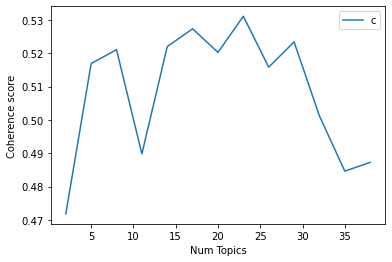

In [16]:
#=================================================-
#### Slide 42: Plot coherence scores  ####

# Plot graph of topic list.
plt.plot(topic_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc = 'best')
plt.show()



In [17]:
#=================================================-
#### Slide 44: Get optimal number of topics  ####

max_coherence = np.max(coherence_values)
print(max_coherence)

optimal_num_topics = topic_range[np.argmax(coherence_values)]
print(optimal_num_topics)



0.5310675148866303
23


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
#=================================================-
#### Slide 50: Visualize topics generated with LDA  ####

# Prepare LDA vis object by providing:
vis = pyLDAvis.gensim.prepare(lda_model_tfidf,   #<- model object
                              corpus_tfidf,      #<- corpus object
                              dictionary)        #<- dictionary object

# The function takes `vis` object that we prepared above as the main argument.
pyLDAvis.display(vis)



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#=================================================-
#### Slide 52: Exercise 2  ####





In [19]:
#=================================================-
#### Slide 63: Get topic probabilities for a document  ####

# Select the index of the document in corpus.
doc_num = 0

# Extract the vector of tf_idf weights for the document.
doc_vec = corpus_tfidf[doc_num]
print(doc_vec)

# Extract topic probabilities for that document.
doc_topics = lda_model_tfidf.get_document_topics(doc_vec)
print(doc_topics)



[(0, 0.25954540320095165), (1, 0.29127945804505345), (2, 0.3055490022471601), (3, 0.3055490022471601), (4, 0.20976922764421047), (5, 0.29127945804505345), (6, 0.268763787812797), (7, 0.25954540320095165), (8, 0.23076512567108073), (9, 0.5825589160901069)]
[(0, 0.050531805), (1, 0.05030218), (2, 0.050616805), (3, 0.79825157), (4, 0.050297633)]


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
#=================================================-
#### Slide 64: Get topic probabilities for a document (cont'd)  ####

# Initialize maximum probability score.
max_prob = 0
# Initialize best topic.
best_topic = 0

# Loop over all topics for the document.
for topic in doc_topics:
    if max_prob <= topic[1]:  #<- if current topic's probability is as high as max
        max_prob = topic[1]   #<- make current topic's probability the new max
        best_topic = topic[0] #<- make current topic best

# Create a tuple with information we just got.
doc_topic_pair = (doc_num, best_topic, max_prob)
print(doc_topic_pair)



(0, 3, 0.79825157)


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#=================================================-
#### Slide 65: Get topic probabilities for a document (cont'd)  ####

# Put it all together into a function that returns a tuple
# with the index of the document, the best fit topic, and its probability.
def GetDocTopicPair(doc_num, corpus, lda_model_tfidf):

    # Extract the vector of tf_idf weights for the document.
    doc_vec = corpus[doc_num]

    # Extract topic probabilities for that document.
    doc_topics = lda_model_tfidf.get_document_topics(doc_vec)

    max_prob = 0
    best_topic = 0

    for topic in doc_topics:
        if max_prob <= topic[1]:
            max_prob = topic[1]
            best_topic = topic[0]

    doc_topic_pair = (doc_num, best_topic, max_prob)

    return(doc_topic_pair)



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#=================================================-
#### Slide 66: Get topic probabilities for all documents  ####

# Create an empty list of the same length as the number of documents.
doc_topic_pairs = [None]*dictionary.num_docs

# Loop through a range of document indices.
for i in range(dictionary.num_docs):
    # For each document index, get the document-topic tuple.
    doc_topic_pairs[i] = GetDocTopicPair(i, corpus_tfidf, lda_model_tfidf)

print(doc_topic_pairs[:10])



[(0, 3, 0.7982507), (1, 3, 0.74036914), (2, 1, 0.7577274), (3, 1, 0.72685695), (4, 2, 0.7742631), (5, 4, 0.7311213), (6, 0, 0.79679924), (7, 0, 0.7129077), (8, 3, 0.7747945), (9, 2, 0.5289932)]


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
#=================================================-
#### Slide 67: Create a dataframe with doc-topic assignments  ####

# Make a dataframe out of a list of tuples.
doc_topic_pairs_df = pd.DataFrame(doc_topic_pairs)

# Assign column names to the dataframe.
doc_topic_pairs_df.columns = ["doc_id", "best_topic", "best_probability"]
print(doc_topic_pairs_df.head())



   doc_id  best_topic  best_probability
0       0           3          0.798251
1       1           3          0.740369
2       2           1          0.757727
3       3           1          0.726857
4       4           2          0.774263


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#=================================================-
#### Slide 68: Matching document ids to NYT data  ####

# Find indices of articles that we kept.
valid_snippets = np.where(word_counts_array >= 5)[0]
print(valid_snippets[120:125])

# Now assign the index of the original article to be the index of the dataframe.
doc_topic_pairs_df.index = valid_snippets
print(doc_topic_pairs_df.iloc[120:125, ])



[120 121 123 124 125]
     doc_id  best_topic  best_probability
120     120           1          0.798328
121     121           1          0.727164
123     122           2          0.659608
124     123           0          0.545718
125     124           4          0.740956


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
#=================================================-
#### Slide 69: Inspect documents for a given topic  ####

# Filter and sort all documents assigned to topic 3 by probability in descending order.
topic3_docs = doc_topic_pairs_df.query("best_topic==2")
topic3_docs = topic3_docs.sort_values(by = "best_probability", ascending = False)
print(topic3_docs.head())

# Let's see how many documents were assigned to that topic.
print(topic3_docs.shape)



     doc_id  best_topic  best_probability
75       75           2          0.804347
181     179           2          0.794047
70       70           2          0.781515
171     169           2          0.780105
184     182           2          0.775857
(45, 3)


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
#=================================================-
#### Slide 70: Inspect documents for a given topic (cont'd)  ####

# Let's get the top 10 documents that were assigned to that topic.
top_10 = topic3_docs.index[0:10,]

# Inspect the top 10 documents in topic 3.
NYT_articles_topic3 = NYT.loc[top_10, :]
print(NYT_articles_topic3[['headline']])



                                              headline
75   Greek Minister Criticizes Police Over Clashes ...
181  India Force Rare Australia Follow-On in Sydney...
70   Air Traffic Controllers' Union Sues Over Unpai...
171  Britain Testing 'No-Deal' Scenario as Brexit V...
184  Australia Dismissed for 300, India Enforce Fol...
144  Froome, Thomas to Skip Giro d'Italia and Focus...
4    Froome, Thomas to Skip Giro d'Italia and Focus...
97   Netflix's 'Sex Education' Is a Trans-Atlantic ...
16   Reaction to Andy Murray's Impending Retirement...
163  The Latest: White House Invites Hill Leaders t...


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
#=================================================-
#### Slide 71: Save LDA visualization to HTML file  ####

# Save the plot as a self-contained HTML file.
pyLDAvis.save_html(vis, plot_dir+"/NYT_LDAvis.html")



/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'plot_dir' is not defined

In [28]:
#=================================================-
#### Slide 73: Exercise 3  ####





/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
#=================================================-
#### Slide 83: Compute TF-IDF weighted TDM (cont'd)  ####

# Convert corpus weighted with TF-IDF to a TDM matrix.
TDM_tf_idf_matrix = matutils.corpus2dense(corpus_tfidf,
                                          DTM.shape[1],
                                          DTM.shape[0])

print(TDM_tf_idf_matrix.shape)
print(type(TDM_tf_idf_matrix))



(1921, 248)
<class 'numpy.ndarray'>


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
#=================================================-
#### Slide 84: Transpose TDM to DTM  ####

# Transpose matrix to get the DTM.
DTM_tf_idf_matrix = TDM_tf_idf_matrix.transpose()
print(DTM_tf_idf_matrix.shape)



(248, 1921)


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
#=================================================-
#### Slide 85: Compute cosine similarity matrix  ####

# Compute similarity matrix (a numpy 2D array).
similarity = cosine_similarity(DTM_tf_idf_matrix)
print(type(similarity))
print(similarity.shape)



<class 'numpy.ndarray'>
(248, 248)


/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#=================================================-
#### Slide 90: Exercise 4  ####



